In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df=pd.read_csv(r"C:\Users\indir\OneDrive\Desktop\anxiety_depression_data.csv")

In [4]:
df.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,None,0,1,None,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,None,1,0,None,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,None,0,1,None,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,None,0,0,None,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,None,1,1,Frequent,8,9,5,7,7


In [8]:
print(df.isnull().sum())

Age                              0
Gender                           0
Education_Level                  0
Employment_Status                0
Sleep_Hours                      0
Physical_Activity_Hrs            0
Social_Support_Score             0
Anxiety_Score                    0
Depression_Score                 0
Stress_Level                     0
Family_History_Mental_Illness    0
Chronic_Illnesses                0
Medication_Use                   0
Therapy                          0
Meditation                       0
Substance_Use                    0
Financial_Stress                 0
Work_Stress                      0
Self_Esteem_Score                0
Life_Satisfaction_Score          0
Loneliness_Score                 0
dtype: int64


In [10]:
#creating dummies for the categorical variables
df=pd.get_dummies(df,columns=['Gender','Education_Level','Employment_Status','Medication_Use','Substance_Use'], drop_first=True)

In [11]:
df.head()

,Age,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Chronic_Illnesses,Therapy,...,Education_Level_Master's,Education_Level_Other,Education_Level_PhD,Employment_Status_Retired,Employment_Status_Student,Employment_Status_Unemployed,Medication_Use_Occasional,Medication_Use_Regular,Substance_Use_None,Substance_Use_Occasional
0,56,6.0,0.4,3,4,2,9,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,69,8.8,2.8,6,18,7,6,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,46,5.3,1.6,5,5,13,8,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,32,8.8,0.5,4,6,3,4,1,1,0,...,0,0,0,0,0,1,0,0,1,0
4,60,7.2,0.7,2,7,15,3,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [35]:
df['sleep_hours_sq']=df['Sleep_Hours'] ** 2
df['Financial_Stress_Work_Stress'] = df['Financial_Stress'] * df['Work_Stress']

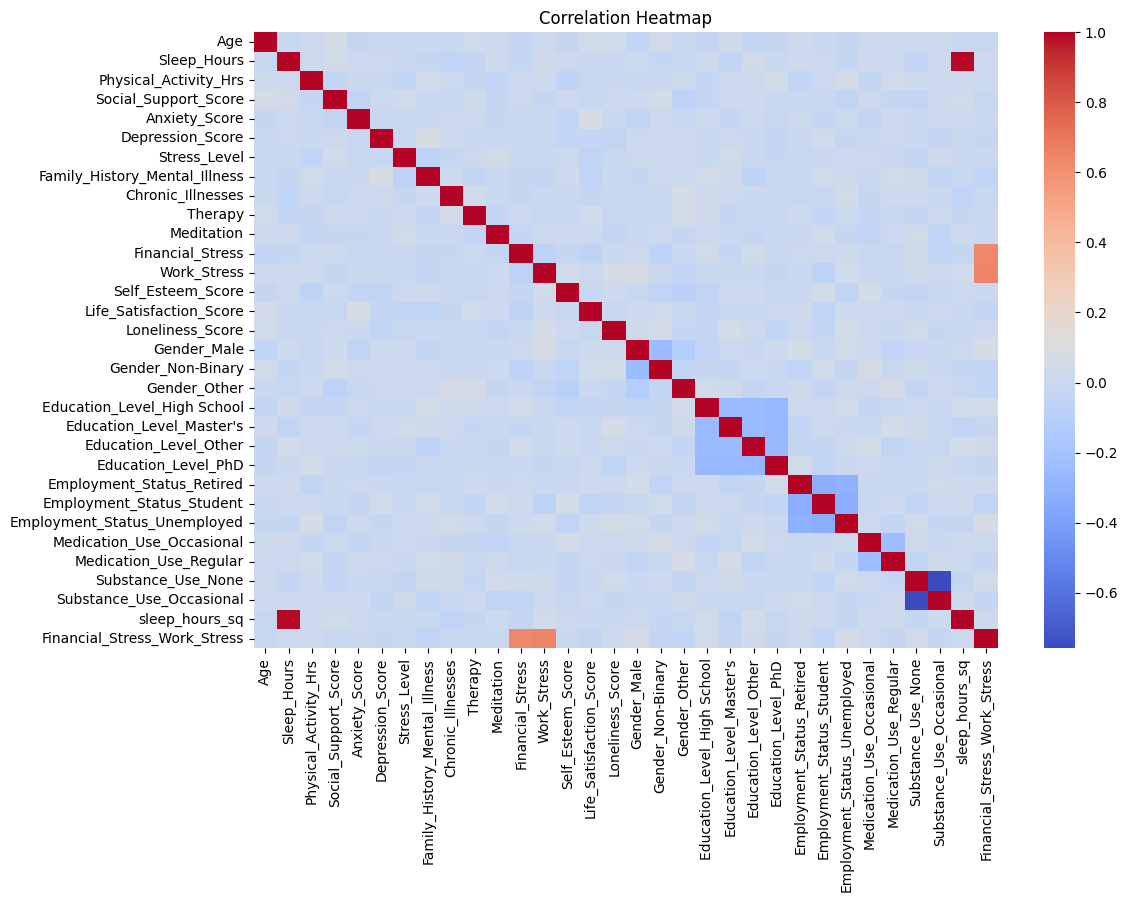

In [36]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [38]:
X=df.drop(columns=['Anxiety_Score','Depression_Score','Sleep_Hours','Financial_Stress','Work_Stress'])
X=sm.add_constant(X)
vif_data=pd.DataFrame()
vif_data["Variable"]=X.columns
vif_data["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

print(vif_data)

                         Variable        VIF
0                           const  54.190400
1                             Age   1.019420
2           Physical_Activity_Hrs   1.025000
3            Social_Support_Score   1.023783
4                    Stress_Level   1.016972
5   Family_History_Mental_Illness   1.028755
6               Chronic_Illnesses   1.016002
7                         Therapy   1.015951
8                      Meditation   1.014735
9               Self_Esteem_Score   1.032739
10        Life_Satisfaction_Score   1.019159
11               Loneliness_Score   1.020592
12                    Gender_Male   1.106909
13              Gender_Non-Binary   1.099077
14                   Gender_Other   1.052061
15    Education_Level_High School   1.745164
16       Education_Level_Master's   1.726163
17          Education_Level_Other   1.729912
18            Education_Level_PhD   1.765505
19      Employment_Status_Retired   1.464881
20      Employment_Status_Student   1.484057
21   Emplo

In [57]:
X_predictor=df[['Age','Sleep_Hours','Employment_Status_Unemployed',"Education_Level_Master's",'Financial_Stress','Work_Stress']]
Y_depression=df['Depression_Score']
Y_anxiety=df['Anxiety_Score']

X_predictor = sm.add_constant(X_predictor)

model_anxiety = sm.OLS(Y_anxiety, X_predictor).fit()
model_depression = sm.OLS(Y_depression, X_predictor).fit()

print("Anxiety Model Summary:")
print(model_anxiety.summary())

Anxiety Model Summary:
                            OLS Regression Results                            
Dep. Variable:          Anxiety_Score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.2950
Date:                Thu, 20 Mar 2025   Prob (F-statistic):              0.939
Time:                        22:27:27   Log-Likelihood:                -3833.5
No. Observations:                1200   AIC:                             7681.
Df Residuals:                    1193   BIC:                             7717.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

In [43]:
print("Depression Model Summary:")
print(model_depression.summary())

Depression Model Summary:
                            OLS Regression Results                            
Dep. Variable:       Depression_Score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.2428
Date:                Thu, 20 Mar 2025   Prob (F-statistic):              0.943
Time:                        22:12:31   Log-Likelihood:                -3776.0
No. Observations:                1200   AIC:                             7564.
Df Residuals:                    1194   BIC:                             7594.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [24]:
import statsmodels.stats.diagnostic as smd

# Breusch-Pagan test for heteroskedasticity
bp_test_anxiety = smd.het_breuschpagan(model_anxiety.resid, model_anxiety.model.exog)
bp_test_depression = smd.het_breuschpagan(model_depression.resid, model_depression.model.exog)

print("Breusch-Pagan Test (Anxiety):", bp_test_anxiety)
print("Breusch-Pagan Test (Depression):", bp_test_depression)

Breusch-Pagan Test (Anxiety): (11.183939067020532, 0.5954116416380515, 0.8582651241383686, 0.5976924311770168)
Breusch-Pagan Test (Depression): (6.207893639607942, 0.9382581619519068, 0.4744133497170704, 0.9393604690026834)


**Using Random Forests to determine how the predictor variable influence the anxiety score**

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_predictor, Y_anxiety)

y_pred = rf_model.predict(X_predictor)
print("R-squared:", rf_model.score(X_predictor, Y_anxiety))

R-squared: 0.8434663618818938


In [68]:
import pandas as pd
import numpy as np

# Get feature importance from trained RF model
importance = rf_model.feature_importances_

# Create a summary table
feature_importance_df = pd.DataFrame({
    "Feature": X_predictor.columns,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

# Display table
print(feature_importance_df)

                        Feature  Importance
2                   Sleep_Hours    0.312998
1                           Age    0.287958
6                   Work_Stress    0.163382
5              Financial_Stress    0.160463
3  Employment_Status_Unemployed    0.040958
4      Education_Level_Master's    0.034241
0                         const    0.000000


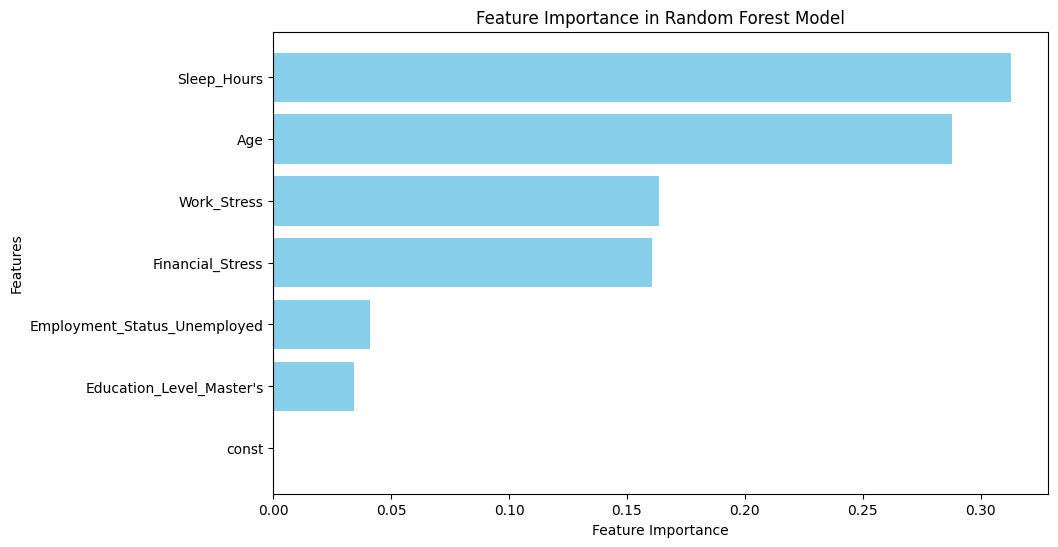

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
features = X_predictor.columns

# Sort & plot
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()


In [60]:
from sklearn.metrics import mean_squared_error

y_pred_rf = rf_model.predict(X_predictor)
y_pred_ols = model_anxiety.predict(X_predictor)

print("OLS MSE:", mean_squared_error(Y_anxiety, y_pred_ols))
print("Random Forest MSE:", mean_squared_error(Y_anxiety, y_pred_rf))

OLS MSE: 34.86071722057615
Random Forest MSE: 5.464970205222505


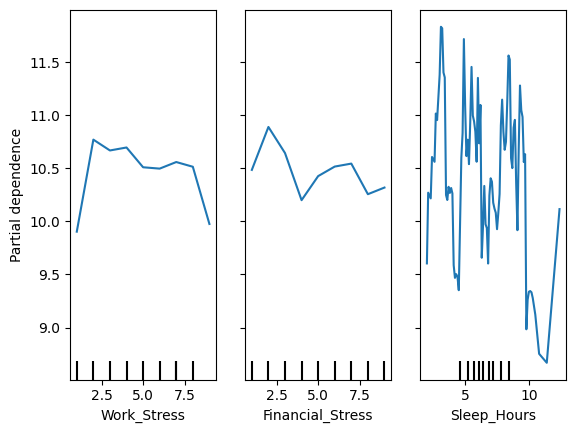

In [61]:
from sklearn.inspection import PartialDependenceDisplay

PartialDependenceDisplay.from_estimator(rf_model, X_predictor, ['Work_Stress', 'Financial_Stress','Sleep_Hours'])
plt.show()